<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/26_%EB%AC%BC%EC%B2%B4%EC%9D%B8%EC%8B%9D_%EA%B8%B0%EC%A4%80%2C_mAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

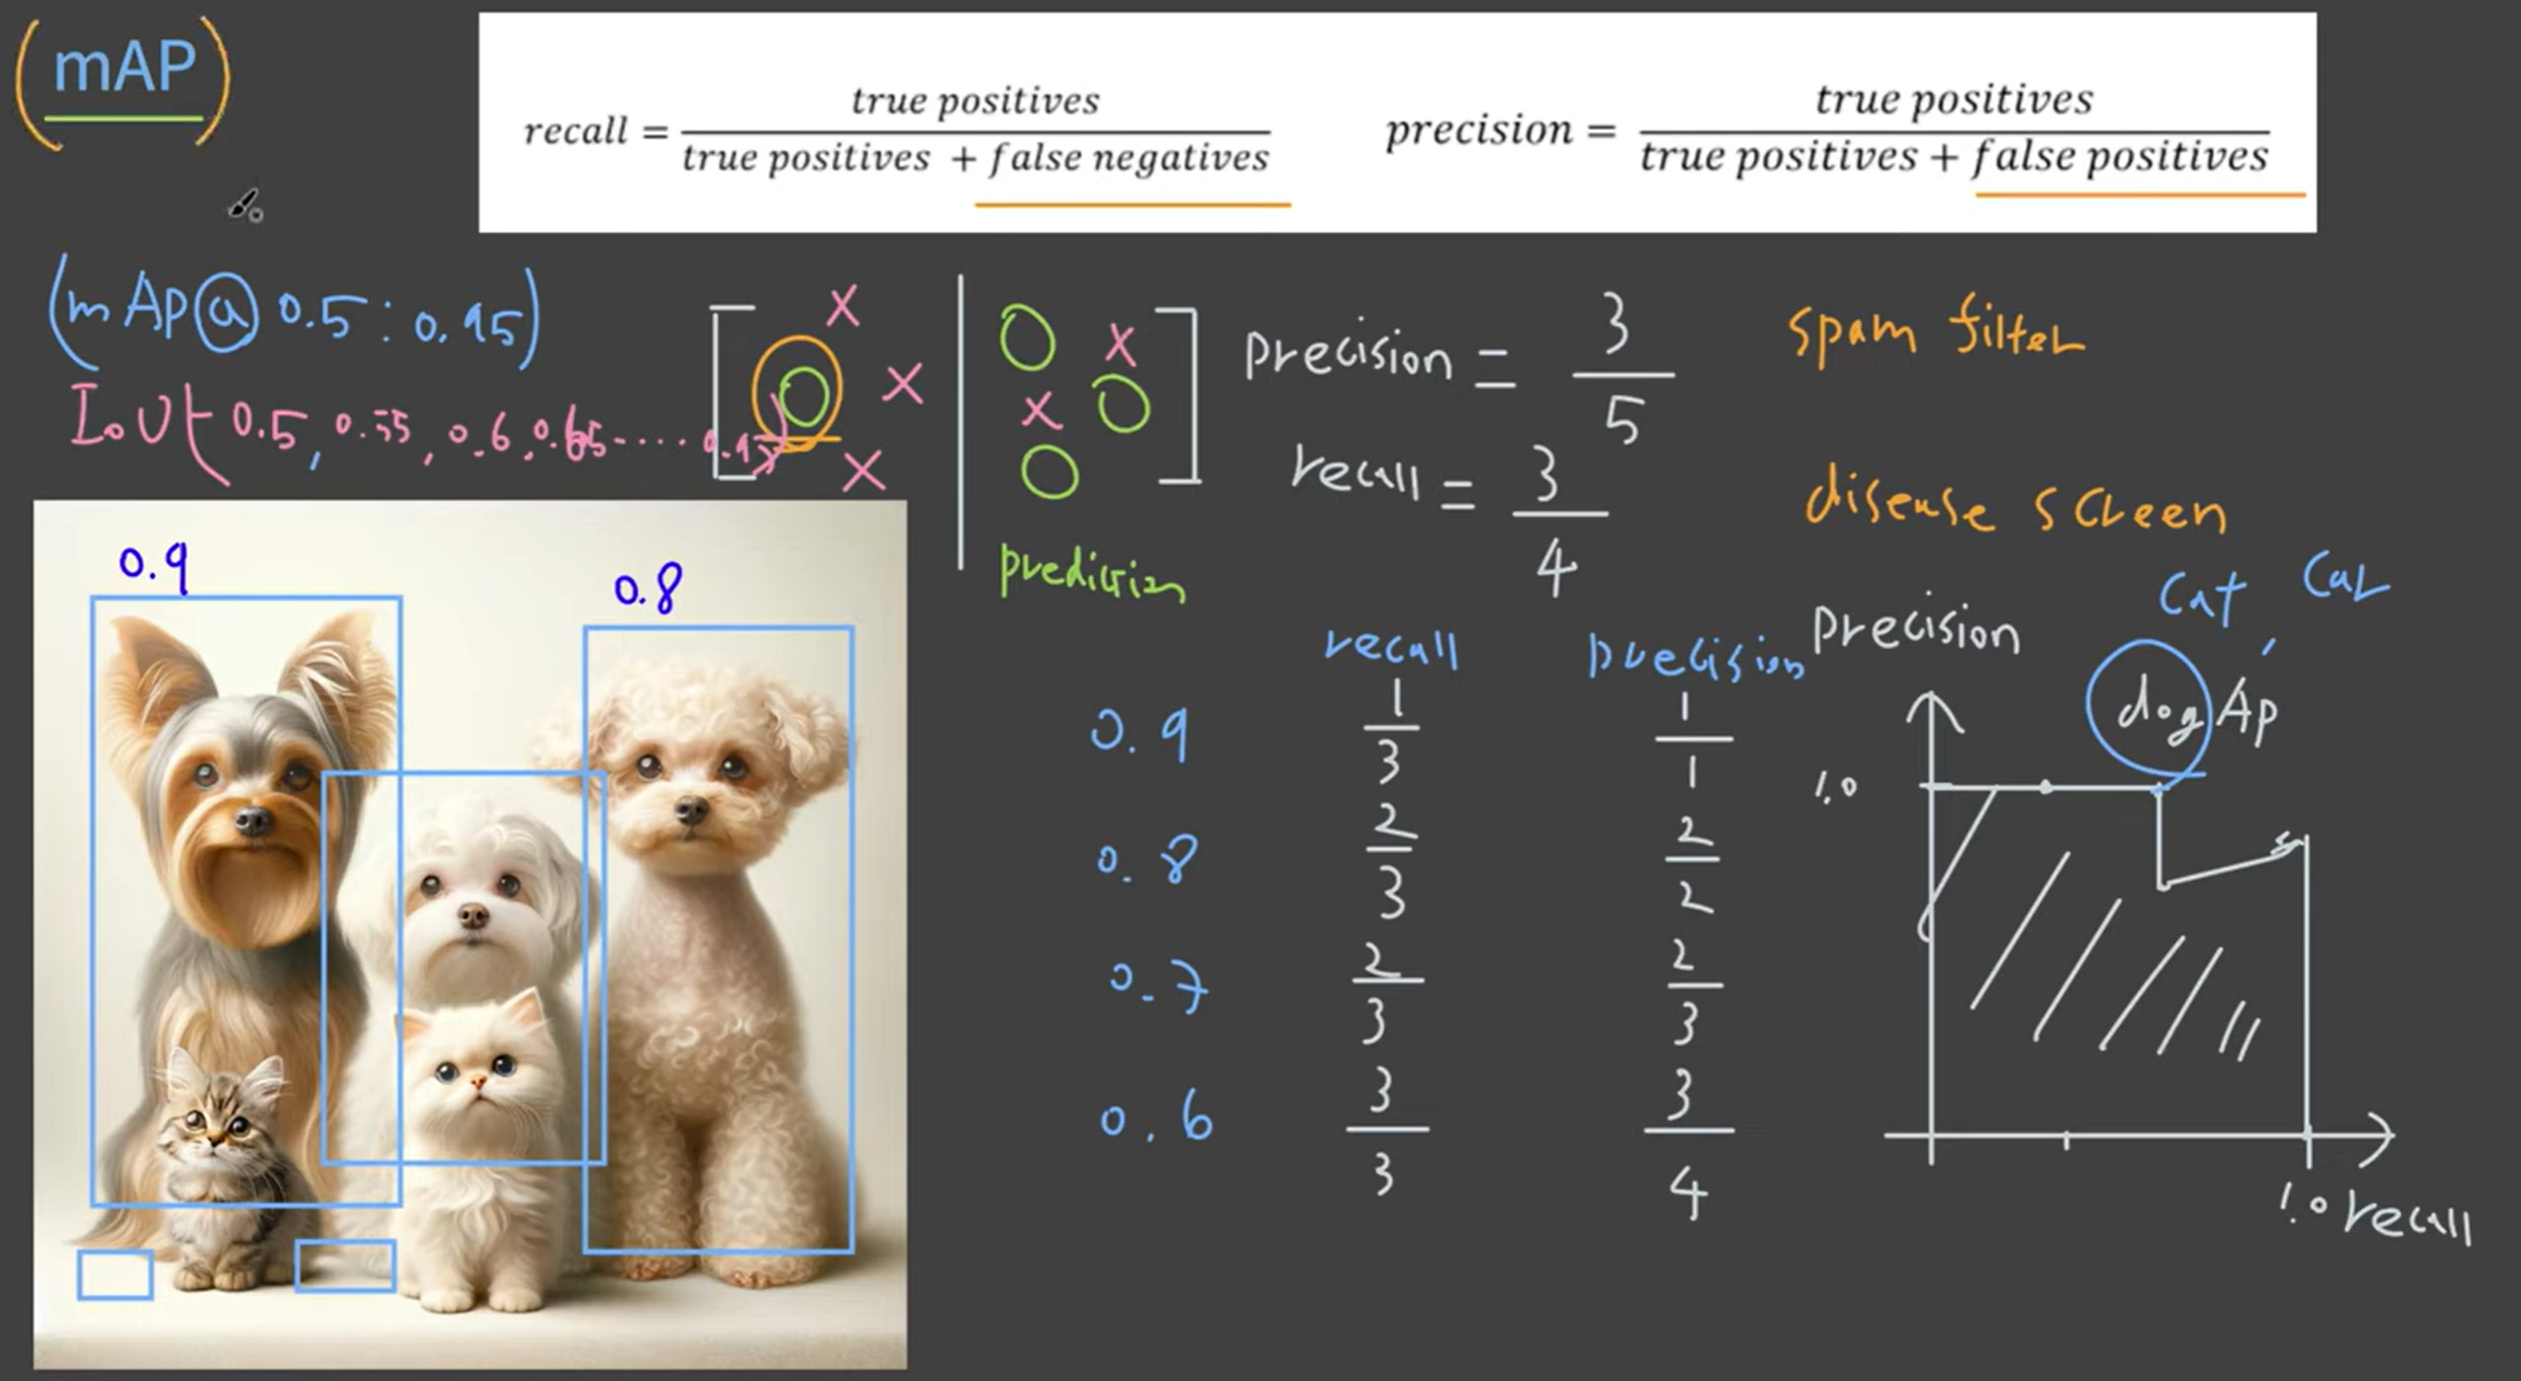

# mAP (mean Average Precision) 정리

## 1. mAP란 무엇인가?

**mAP (mean Average Precision)** 은  
오브젝트 디텍션(Object Detection) 모델의 성능을 평가할 때 사용하는 **표준 지표**이다.

- 분류 정확도(accuracy)처럼 단순한 값이 아님
- **Precision(정밀도)** 과 **Recall(재현율)** 을 모두 고려
- 클래스별 성능(AP)을 계산한 뒤 평균을 낸 값

👉 **1.0에 가까울수록 좋은 모델**

---

## 2. Precision과 Recall 개념

### 2.1 Precision (정밀도)

> 모델이 **맞다고 예측한 것 중에서**,  
> **실제로 맞은 비율**


$$Precision = (정답으로 맞춘 개수) / (정답이라고 예측한 전체 개수)$$

- False Positive(틀린 양성 예측)가 많으면 Precision ↓
- 예시: 스팸 메일 필터  
  → 스팸이 아닌 메일을 스팸으로 분류하면 문제  
  → **Precision이 중요**

---

### 2.2 Recall (재현율)

> **실제 정답 중에서**,  
> **모델이 맞게 찾아낸 비율**


$$Recall = (정답으로 맞춘 개수) / (실제 정답 개수)$$


- False Negative(놓친 정답)가 많으면 Recall ↓
- 예시: 질병 진단, 의료 스크리닝  
  → 환자를 놓치면 치명적  
  → **Recall이 중요**

---

## 3. Precision–Recall 그래프

- x축: Recall
- y축: Precision
- **PR Curve 아래 면적 = AP (Average Precision)**

직관적으로:
- 그래프 면적이 클수록 성능이 좋음
- 최대값은 1.0

---

## 4. Object Detection에서 AP 계산 흐름

### 예시 상황
- 실제 강아지: **3마리**
- 모델 예측 박스 4개 (confidence score 기준 정렬)

| 순서 | Score | 결과 |
|----|------|------|
| 1 | 0.9 | True Positive |
| 2 | 0.8 | True Positive |
| 3 | 0.7 | False Positive (고양이를 강아지로) |
| 4 | 0.6 | True Positive (IoU ≥ 0.5 기준) |

---

### 누적 Precision / Recall 계산

| 사용한 박스 | Recall | Precision |
|-----------|--------|-----------|
| 0.9 | 1/3 | 1/1 |
| 0.9, 0.8 | 2/3 | 2/2 |
| + 0.7 | 2/3 | 2/3 |
| + 0.6 | 3/3 | 3/4 |

이 점들을 이어서 **PR Curve**를 만들고  
그 **아래 면적이 강아지 클래스의 AP**

---

## 5. mAP 계산 방법

### 5.1 클래스별 AP

- 강아지 → AP_dog
- 고양이 → AP_cat
- 자동차 → AP_car
- …

---

### 5.2 mean Average Precision (mAP)


$$mAP = (AP_dog + AP_cat + AP_car + ...) / 클래스 수$$


---

## 6. IoU 기준에 따른 mAP 표기

### 6.1 mAP@0.5
- IoU ≥ 0.5 일 때만 정답 인정

### 6.2 mAP@0.5:0.95
- IoU 기준:
  - 0.50, 0.55, 0.60, … , 0.95
- 각 IoU 기준에서 AP 계산
- 그 평균이 최종 mAP

👉 **COCO benchmark에서 사용하는 가장 엄격한 기준**

---

## 7. 핵심 요약

- mAP는 **Precision + Recall + IoU** 를 모두 반영한 지표
- 단순 정확도보다 훨씬 신뢰도 높음
- **1.0에 가까울수록 좋은 모델**
- 실제로는:
  - “mAP@0.5”
  - “mAP@0.5:0.95”
  이 두 가지 표기를 가장 많이 봄

---

## 8. 기억하면 좋은 한 문장

> **Confidence score가 높은 순서대로,  
> 정답 박스만 정확히 맞추면  
> mAP는 자연스럽게 1.0에 가까워진다.**
```

---